Let's compare trajectories generated with different values of $w$.
We use the same noise for all trajectories.

In [7]:
import math
import numpy as np 

# Simulation of an active Brownian colloid in water at room temperature.

R = 1e-6  # Radius of the Brownian particle [m].
eta = 1e-3  # Viscosity of the medium.
gamma = 6 * np.pi * R * eta  # Drag coefficient. 
gammaR = 8 * np.pi * R ** 3 * eta  # Rotational drag coefficient. 
kB = 1.380e-23  # Boltzmann constant [J/K].
T = 300  # Temperature [K].
kBT = kB * T  # kB*T at room temperature [J].
D = kBT / gamma  # Diffusion constant [m^2 / s].
DR = kBT / gammaR  # Rotational diffusion constant [1 / s].
t_r = 1 / DR  # Orientation relaxation time.
dt = 2e-2  # Time step [s].
duration = 10000  # Total time [s].

# Try: v = 0, 1e-6
v = 50e-6 # Self-propulsion speed [m/s]. # 50 microseconds
w_list = np.array([0, 1/2*math.pi, math.pi, 3/2*math.pi]) 
N_traj = np.size(w_list)

print(f't_r={t_r:.3f} s')

x0 = 0  # Initial position [m].
y0 = 0  # Initial position [m].
phi0 = 0  # Initial orientation [rad].

# Coefficients for the finite difference solution.
c_noise_x = np.sqrt(2 * D * dt)
c_noise_y = np.sqrt(2 * D * dt)
c_noise_phi = np.sqrt(2 * DR * dt)

N = math.ceil(duration / dt)  # Number of time steps.

x = np.zeros([N_traj, N])
y = np.zeros([N_traj, N])
phi = np.zeros([N_traj, N])

rn = np.random.normal(0, 1, size=(3, N - 1))
    
for j in range(N_traj):
    x[j, 0] = x0
    y[j, 0] = y0
    phi[j, 0] = phi0

for i in range(N - 1):
    for j in range(N_traj):
        x[j, i + 1] = x[j, i] + v* dt * np.cos(phi[j, i]) + c_noise_x * rn[0, i] # Have a single v instead of v_list[j]
        y[j, i + 1] = y[j, i] + v* dt * np.sin(phi[j, i]) + c_noise_y * rn[1, i]
        phi[j, i + 1] = phi[j, i] + w_list[j] *dt + c_noise_phi * rn[2, i] # Added w times delta_t

n = int(2*t_r / dt)  # Number of steps n needed to plot (2 orientation relaxation times).     
t = dt * np.arange(math.ceil(duration / dt))

t_r=6.071 s


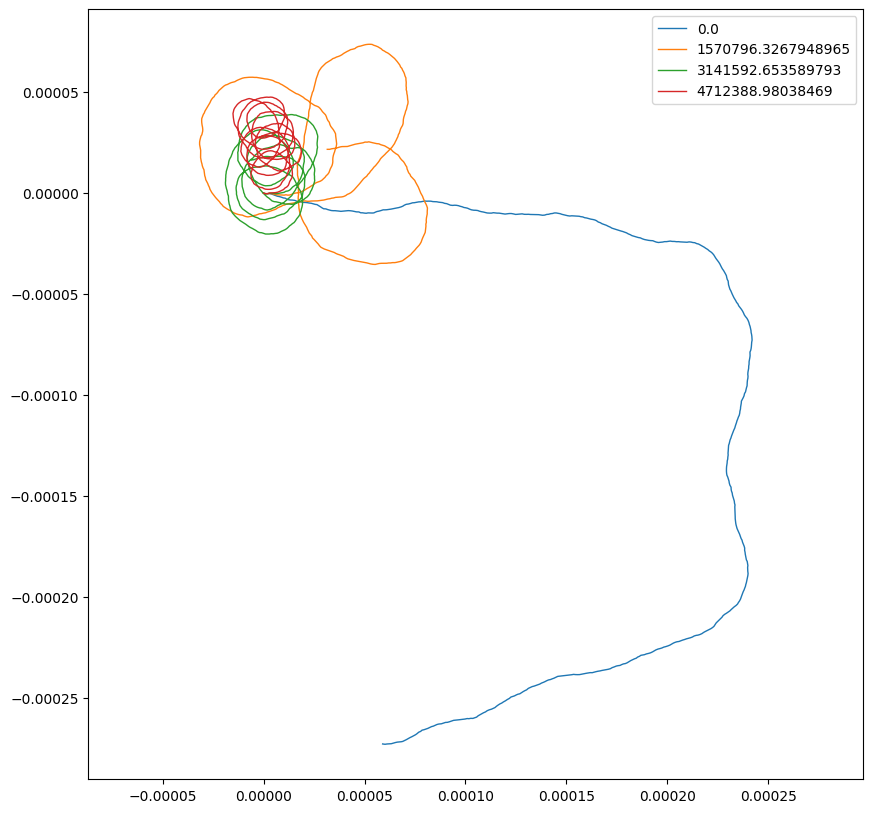

In [8]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
for j in range(N_traj):
    plt.plot(x[j, :n], y[j, :n], '-', linewidth=1, label=str(w_list[j] * 1e+6) )
plt.axis('equal')
plt.legend()
plt.show()

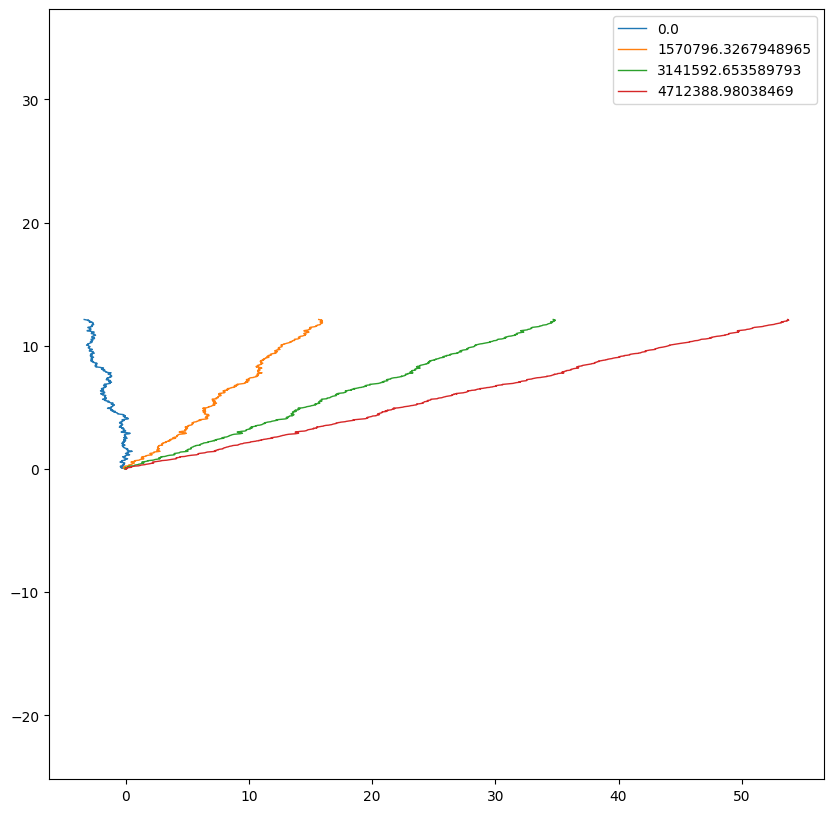

In [9]:
from matplotlib import pyplot as plt
import numpy as np 

n_length = np.linspace(0,2*t_r ,n)
plt.figure(figsize=(10, 10))
for j in range(N_traj):
    plt.plot(phi[j,:n],n_length, '-', linewidth=1, label=str(w_list[j] * 1e+6) )
plt.axis('equal')
plt.legend()
plt.show()

In [10]:
def MSD_2d(x, y, n_delays):
    """
    Function to calculate the MSD.
    
    Parameters
    ==========
    x : Trajectory (x component).
    y : Trajectory (y component).
    n_delays : Indicates the delays to be used to calculate the MSD.
    """
    L = np.size(n_delays)
    msd = np.zeros(L)
    
    nelem = np.size(x)
    
    for i in range(L):
        n = n_delays[i]
        Nmax = nelem - n
        dx = x[n:nelem] -  x[0: Nmax]
        dy = y[n:nelem] -  y[0: Nmax]
        msd[i] += np.mean(dx ** 2 + dy ** 2)

    return msd

In [11]:
# n_delays = np.array(range(N))  # This is very slow.

# Select the delays to be equally spaced on a logarithmic scale.
# This way the calculation is faster.
# Precision is maintained.
base_log = 2
n_delays = base_log ** np.array(np.arange(np.floor(np.log(N) / np.log(base_log))))

MSD = np.zeros([N_traj, np.size(n_delays)])  # MSD for each trajectory.
t_delay = n_delays * dt  # Time delay.

for i in range(N_traj):
    # print(f'i={i} of {N_traj - 1}')
    MSD[i, :] = MSD_2d(x[i, :], y[i, :], n_delays.astype(int))
    

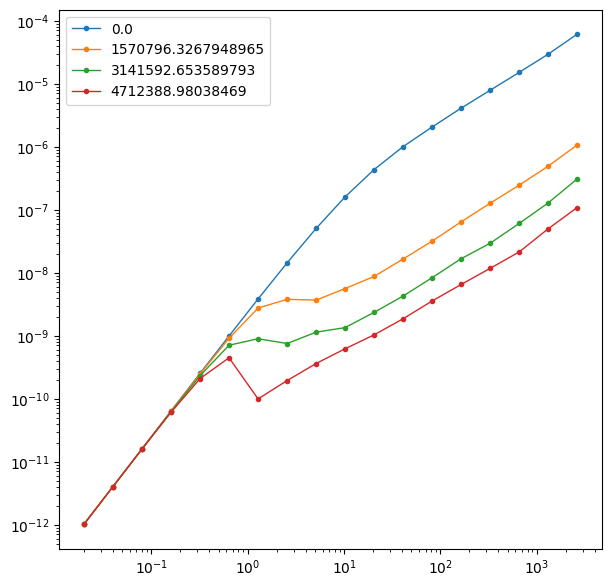

In [12]:
from matplotlib import pyplot as plt

plt.figure(figsize=(7, 7))
for j in range(N_traj):
    plt.loglog(t_delay, MSD[j, :], '.-', linewidth=1, label=str(w_list[j] * 1e+6) )
plt.legend()
plt.show()       